In [1]:
import  os
import matplotlib.pyplot as plt
import SimpleITK as sitk
import torch
import numpy as np
import nibabel as nib

# flipmatrix dir in epoch
full_list = os.listdir('/home/dell/data/Dataset/Brats20/Result/nnUNet/3d_fullres/Task043_BraTS2020/KickflipUNetTrainerV5__nnUNetPlansv2.1/fold_5/flip_matrix') 
data_list = []
for names in full_list:
    if names.startswith("epoch"):
        data_list.append(names)
print(data_list)

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.
['epoch1', 'epoch181', 'epoch166', 'epoch112', 'epoch50', 'epoch156', 'epoch184', 'epoch4', 'epoch152', 'epoch127', 'epoch139', 'epoch97', 'epoch104', 'epoch46', 'epoch169', 'epoch177', 'epoch131', 'epoch135', 'epoch137', 'epoch31', 'epoch5', 'epoch45', 'epoch63', 'epoch195', 'epoch149', 'epoch187', 'epoch92', 'epoch30', 'epoch155', 'epoch49', 'epoch164', 'epoch91', 'epoch2', 'epoch78', 'epoch57', 'epoch14', 'epoch124', 'epoch114', 'epoch15', 'epoch134', 'epoch144', 'epoch126', 'epoch130', 'epoch192', 'epoch161', 'epoch119', 'epoch116', 'epoch188', 'epoch87', 'epoch40', 'epoch75', 'epoch107', 'epoch191', 'epoch12', 'epoch25', 'epoch69', 'epoch145', 'epoch18', 'epoch121', 'epoch9', 'epoch36', 'epoch56', 'epoch174', 'epoch154', 'epoch55', 'epoch101', 'epoch138', 'epoch26', 'epoch99', 'epoch102', 'epoch19', 'epoch61', 'epoch33', 'epoch84', 'epoch64'

## start with dir epoch198

In [4]:
datadir = os.path.join('/home/dell/data/Dataset/Brats20/Result/nnUNet/3d_fullres/Task043_BraTS2020/KickflipUNetTrainerV5__nnUNetPlansv2.1/fold_5/flip_matrix',data_list[3])
print(datadir)

/home/dell/data/Dataset/Brats20/Result/nnUNet/3d_fullres/Task043_BraTS2020/KickflipUNetTrainerV5__nnUNetPlansv2.1/fold_5/flip_matrix/epoch112


In [5]:
full_list = os.listdir(datadir) 
matrix_list = []
for names in full_list:
    if names.endswith("nii.gz"):
        matrix_list.append(names)
print(matrix_list)


['target.nii.gz', 'image.nii.gz', 'flip_matrix.nii.gz']


# thress matries saved from our model training ['image.nii.gz', 'target.nii.gz', 'flip_matrix.nii.gz']

In [6]:
# pathes to matries
#for i in range
image_dir = os.path.join(datadir,'image.nii.gz')
image=nib.load(image_dir).get_fdata()
print(image.shape)
target_dir = os.path.join(datadir,'target.nii.gz')
target=nib.load(target_dir).get_fdata()
print(target.shape)
flip_dir = os.path.join(datadir,'flip_matrix.nii.gz')
flip=nib.load(flip_dir).get_fdata()
print(flip.shape)


(2, 4, 128, 128, 128)
(2, 1, 128, 128, 128)
(2, 4, 128, 128, 128)


# how can we get label from target and flipmatrix, what you are going to plot is target(label) and label2 on the image.

# image modalities in the second image dimension

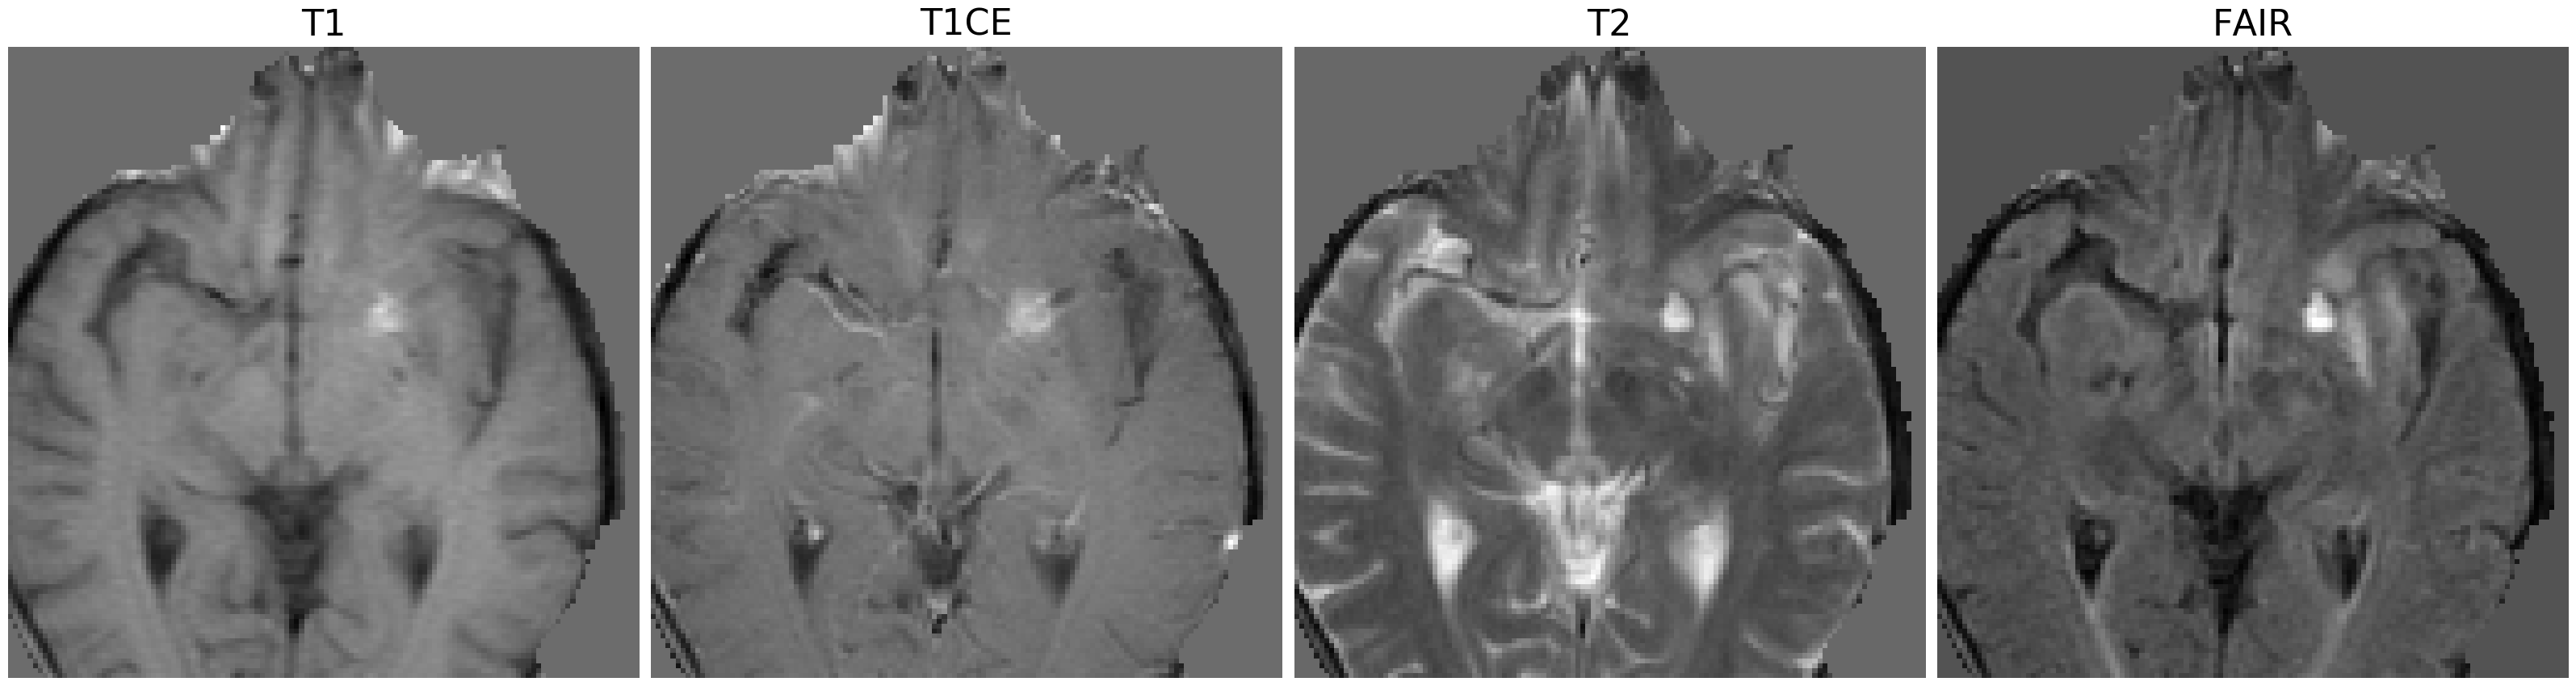

In [7]:
fig,axs = plt.subplots(1, 4,figsize=(32,9), dpi= 100, facecolor='w', edgecolor='k')
for i, modality,ax in zip(range(4),['T1','T1CE','T2','FAIR'],axs):
    ax.imshow(image[0,i,60,:,:],cmap='gray')
    ax.axis('off')
    ax.set_title(modality, y=1.0, pad=10,fontsize=32)
plt.tight_layout()
plt.show()


# the target indicates the tumor locations with 0(background), 1(edma), 2(non-enhancing tumor), 3(enchancing tumor)

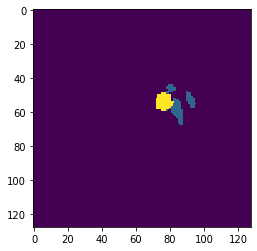

In [12]:
# label demo
plt.imshow(target[0,0,60,:,:])
plt.show()

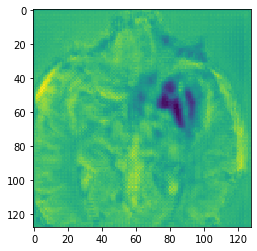

In [13]:
# flip demo
plt.imshow(flip[0,0,60,:,:])
plt.show()

# this is how you can calculate the label2 from target with flip matrix, a few functions might be missing, as pengyu yin for help.

In [28]:
print('image shape',image.shape)
print('target shape',target.shape)
print('flip shape',flip.shape)
print('binary shape',target_binary)

image shape (2, 4, 128, 128, 128)
target shape (2, 1, 128, 128, 128)
flip shape (2, 4, 128, 128, 128)
binary shape [[[[[1. 1. 1. ... 1. 1. 1.]
    [1. 1. 1. ... 1. 1. 1.]
    [1. 1. 1. ... 1. 1. 1.]
    ...
    [1. 1. 1. ... 1. 1. 1.]
    [1. 1. 1. ... 1. 1. 1.]
    [1. 1. 1. ... 1. 1. 1.]]

   [[1. 1. 1. ... 1. 1. 1.]
    [1. 1. 1. ... 1. 1. 1.]
    [1. 1. 1. ... 1. 1. 1.]
    ...
    [1. 1. 1. ... 1. 1. 1.]
    [1. 1. 1. ... 1. 1. 1.]
    [1. 1. 1. ... 1. 1. 1.]]

   [[1. 1. 1. ... 1. 1. 1.]
    [1. 1. 1. ... 1. 1. 1.]
    [1. 1. 1. ... 1. 1. 1.]
    ...
    [1. 1. 1. ... 1. 1. 1.]
    [1. 1. 1. ... 1. 1. 1.]
    [1. 1. 1. ... 1. 1. 1.]]

   ...

   [[1. 1. 1. ... 1. 1. 1.]
    [1. 1. 1. ... 1. 1. 1.]
    [1. 1. 1. ... 1. 1. 1.]
    ...
    [1. 1. 1. ... 1. 1. 1.]
    [1. 1. 1. ... 1. 1. 1.]
    [1. 1. 1. ... 1. 1. 1.]]

   [[1. 1. 1. ... 1. 1. 1.]
    [1. 1. 1. ... 1. 1. 1.]
    [1. 1. 1. ... 1. 1. 1.]
    ...
    [1. 1. 1. ... 1. 1. 1.]
    [1. 1. 1. ... 1. 1. 1.]
    [1. 1. 1. ...

(2, 4, 128, 128, 128)


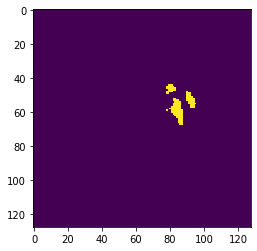

In [29]:
shape = target.shape
out = np.zeros([shape[0], 4, shape[2], shape[3], shape[4]])
target_4d = np.squeeze(target)
for i in range(4):
    out[:, i, :, :, :] =(target_4d == i)
print(out.shape)
plt.imshow(out[0,1,60,:,:])
plt.show()

In [30]:
print(target_binary)

[[[[[1. 1. 1. ... 1. 1. 1.]
    [1. 1. 1. ... 1. 1. 1.]
    [1. 1. 1. ... 1. 1. 1.]
    ...
    [1. 1. 1. ... 1. 1. 1.]
    [1. 1. 1. ... 1. 1. 1.]
    [1. 1. 1. ... 1. 1. 1.]]

   [[1. 1. 1. ... 1. 1. 1.]
    [1. 1. 1. ... 1. 1. 1.]
    [1. 1. 1. ... 1. 1. 1.]
    ...
    [1. 1. 1. ... 1. 1. 1.]
    [1. 1. 1. ... 1. 1. 1.]
    [1. 1. 1. ... 1. 1. 1.]]

   [[1. 1. 1. ... 1. 1. 1.]
    [1. 1. 1. ... 1. 1. 1.]
    [1. 1. 1. ... 1. 1. 1.]
    ...
    [1. 1. 1. ... 1. 1. 1.]
    [1. 1. 1. ... 1. 1. 1.]
    [1. 1. 1. ... 1. 1. 1.]]

   ...

   [[1. 1. 1. ... 1. 1. 1.]
    [1. 1. 1. ... 1. 1. 1.]
    [1. 1. 1. ... 1. 1. 1.]
    ...
    [1. 1. 1. ... 1. 1. 1.]
    [1. 1. 1. ... 1. 1. 1.]
    [1. 1. 1. ... 1. 1. 1.]]

   [[1. 1. 1. ... 1. 1. 1.]
    [1. 1. 1. ... 1. 1. 1.]
    [1. 1. 1. ... 1. 1. 1.]
    ...
    [1. 1. 1. ... 1. 1. 1.]
    [1. 1. 1. ... 1. 1. 1.]
    [1. 1. 1. ... 1. 1. 1.]]

   [[1. 1. 1. ... 1. 1. 1.]
    [1. 1. 1. ... 1. 1. 1.]
    [1. 1. 1. ... 1. 1. 1.]
    ...
    [1. 1.

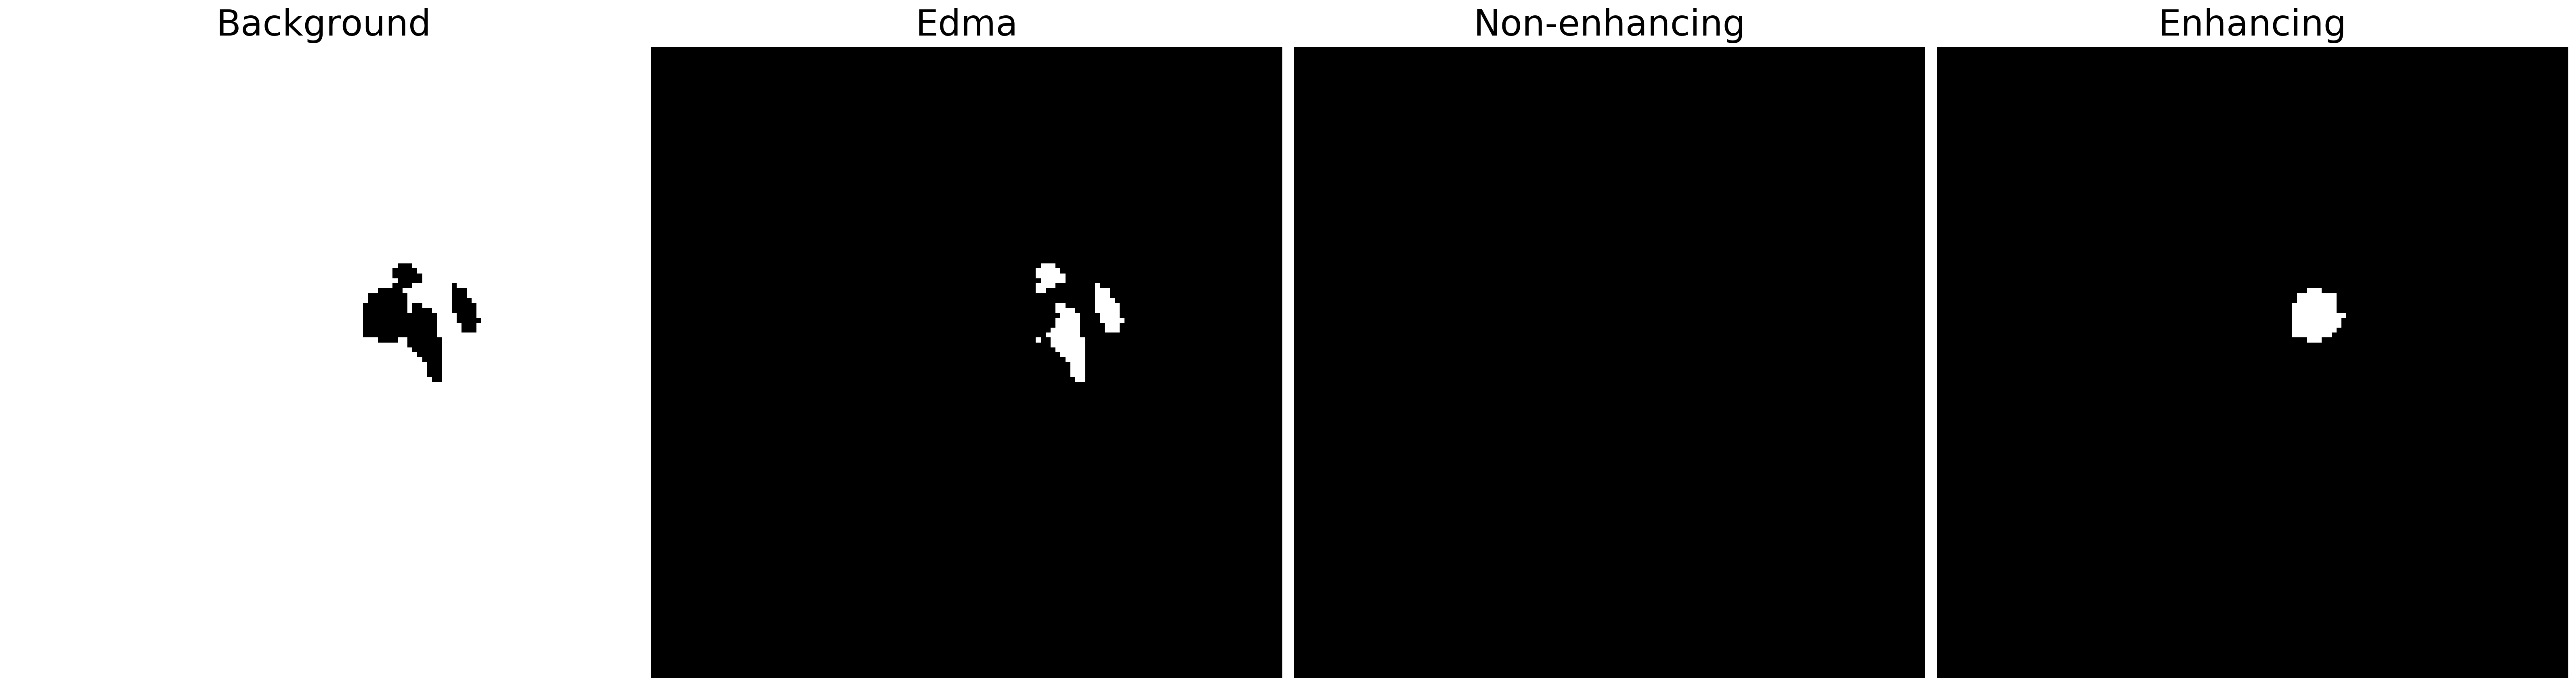

In [42]:
def to_binary_np(target):
    shape = target.shape
    out = np.zeros([shape[0], 4, shape[2], shape[3], shape[4]])
    target_4d = np.squeeze(target)
    for i in range(4):
        out[:, i, :, :, :] =(target_4d == i)
    return out

def to_binary(y):
    shape = y.shape
    c = int(y.max() + 1)
    out = torch.zeros([shape[0], c, shape[2], shape[3], shape[4]])
    for i in range(c):
        out[:, i:i + 1, :, :, :] = (y == i)
    return out
    
# 0(background), 1(edma), 2(non-enhancing tumor), 3(enchancing tumor)¶
target_binary = to_binary_np(target)
fig1,axs = plt.subplots(1, 4,figsize=(32,9), dpi= 200, facecolor='w', edgecolor='k')
for i, label_type,ax in zip(range(4),['Background','Edma','Non-enhancing','Enhancing'],axs):
    ax.imshow(target_binary[0,i,60,:,:],cmap='gray')
    ax.axis('off')
    ax.set_title(label_type, y=1.0, pad=10,fontsize=32)
plt.tight_layout()
plt.show()

In [44]:
flip_matrix = torch.from_numpy(flip)
target = torch.from_numpy(target)
image = torch.from_numpy(image)

In [45]:
def softmax_helper(x):
    rpt = [1 for _ in range(len(x.size()))]
    rpt[1] = x.size(1)
    x_max = x.max(1, keepdim=True)[0].repeat(*rpt)
    e_x = torch.exp(x - x_max)
    return e_x / e_x.sum(1, keepdim=True).repeat(*rpt)

In [46]:
import torch
label = to_binary(target)
label2 = softmax_helper(torch.tanh(flip_matrix).float() + label)
label2 = label2.argmax(1)
label2 = torch.unsqueeze(label2, 1)
label2 = to_binary(label2)

In [47]:
print(label.dtype)
print(target.dtype)
print(flip_matrix.dtype)

torch.float32
torch.float64
torch.float64


# label 1

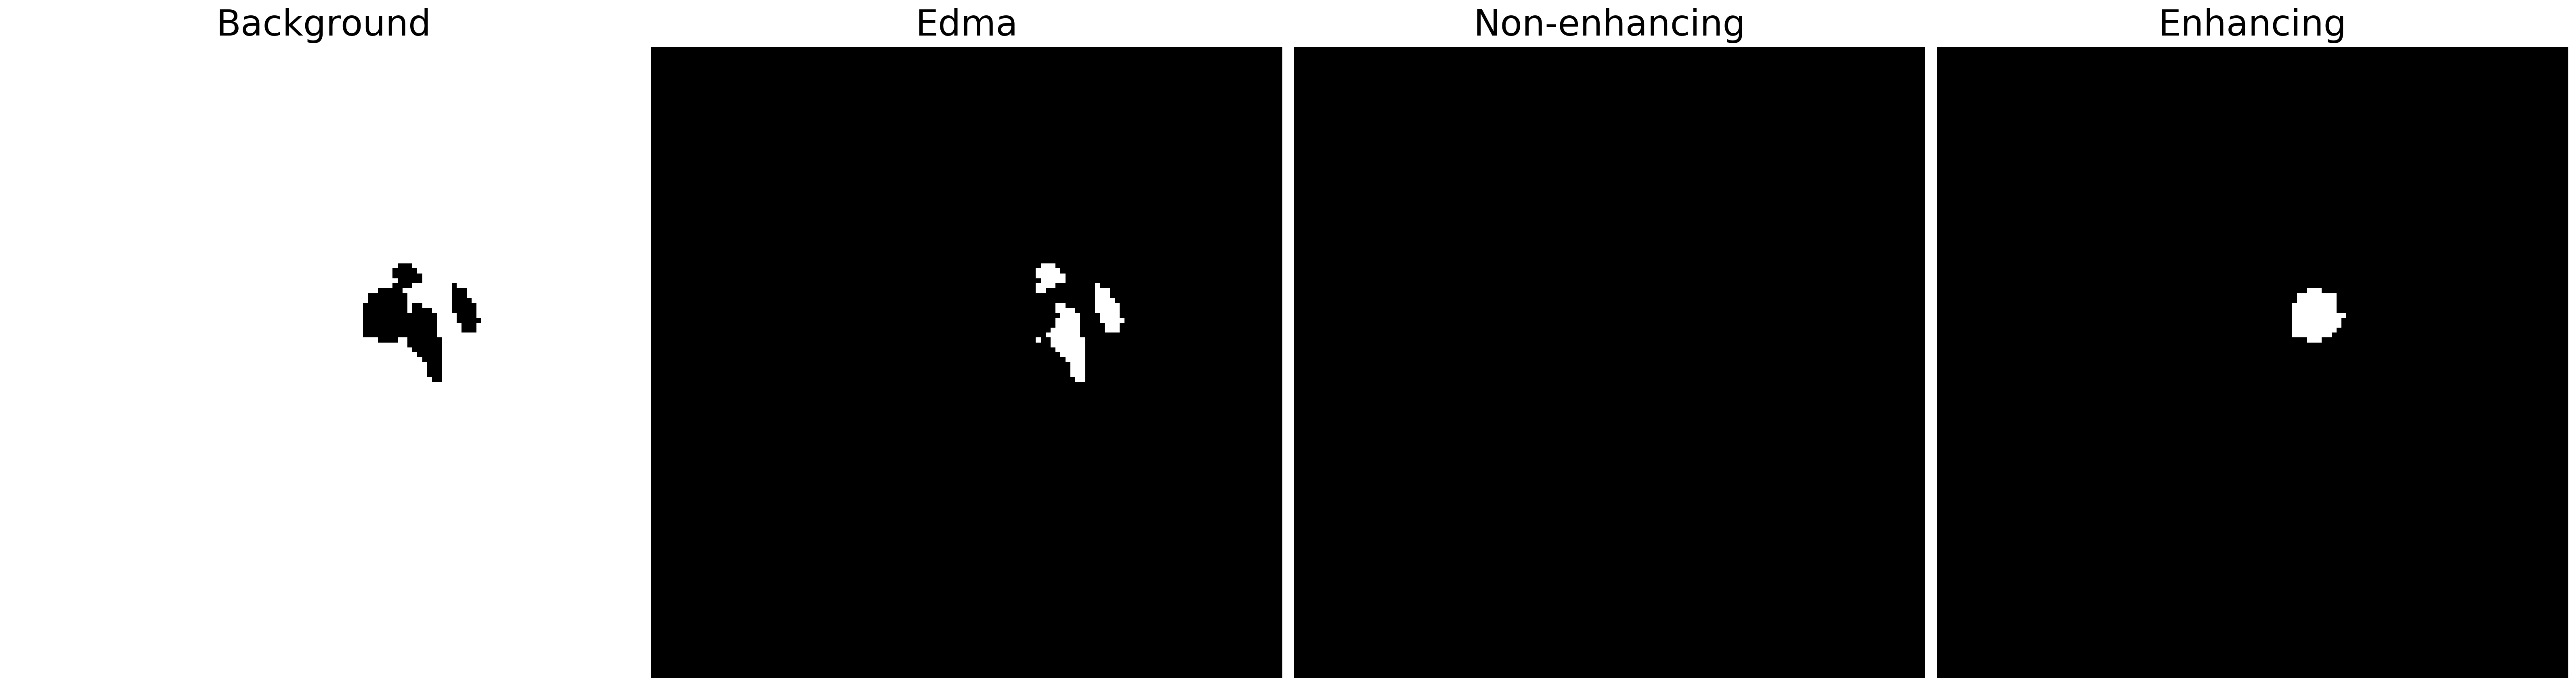

In [48]:
fig2,axs = plt.subplots(1, 4,figsize=(32,9), dpi= 200, facecolor='w', edgecolor='k')
for i, label_type,ax in zip(range(4),['Background','Edma','Non-enhancing','Enhancing'],axs):
    ax.imshow(label[0,i,60,:,:],cmap='gray')
    ax.axis('off')
    ax.set_title(label_type, y=1.0, pad=10,fontsize=32)
plt.tight_layout()
plt.show()

# label2

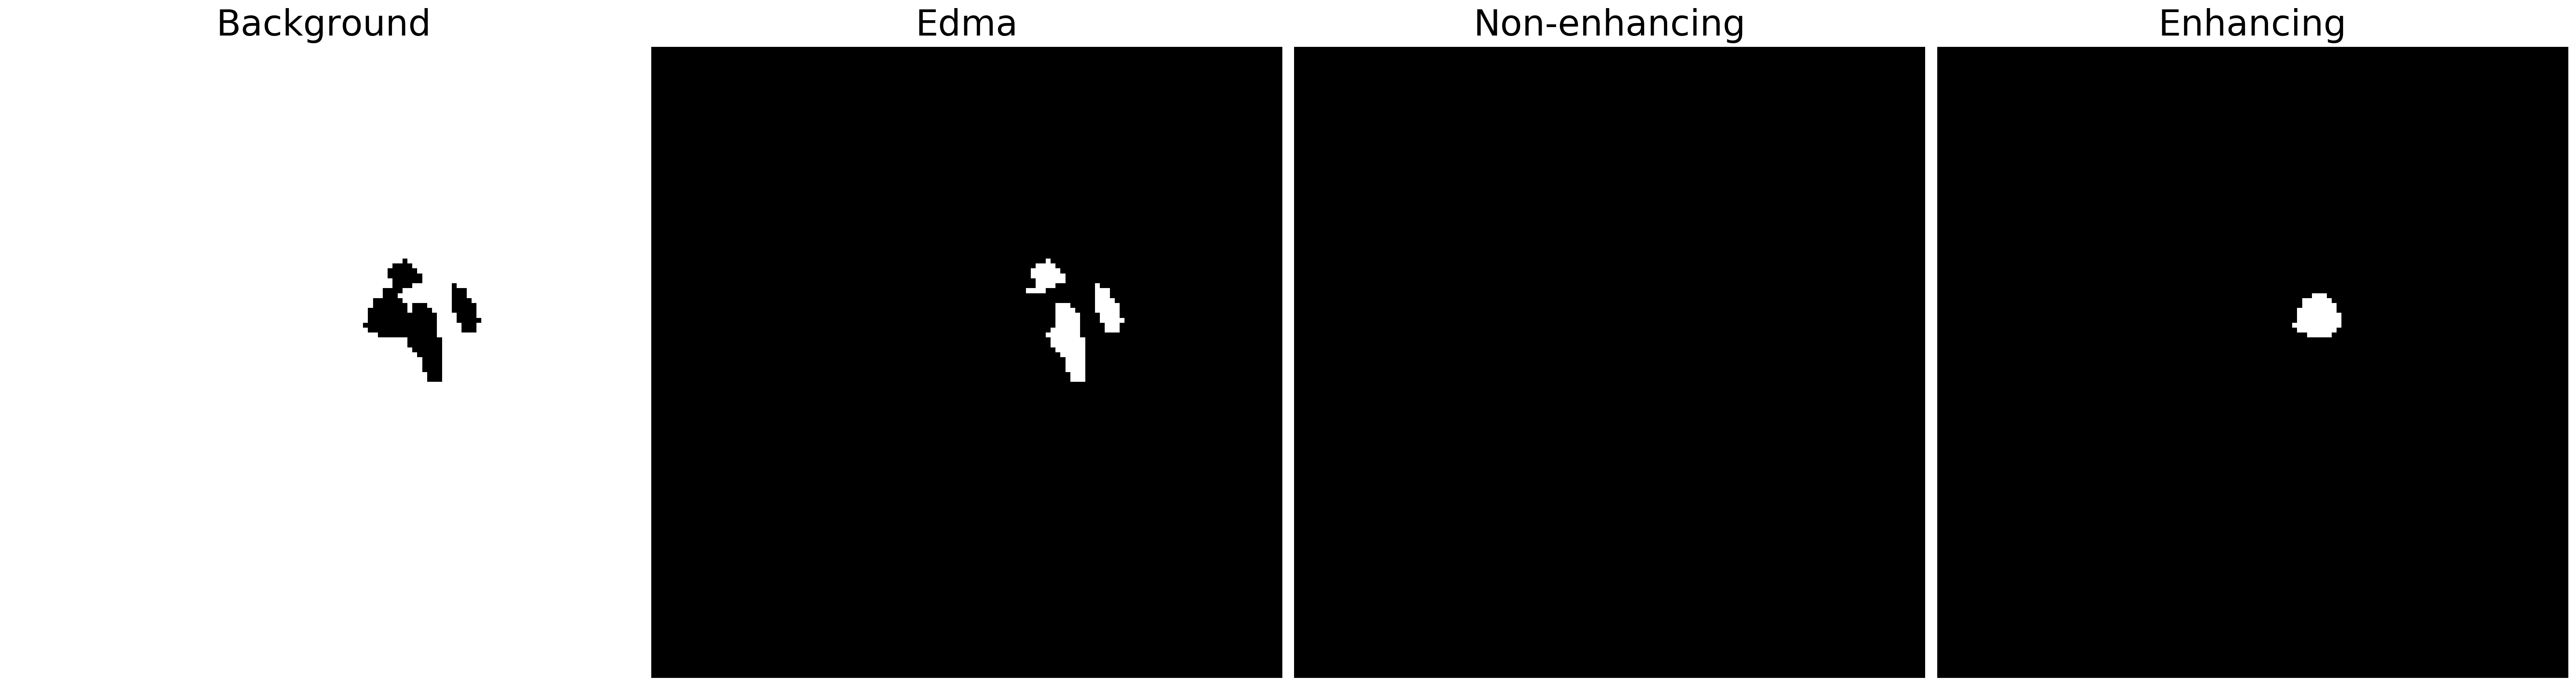

In [49]:
fig2,axs = plt.subplots(1, 4,figsize=(32,9), dpi= 200, facecolor='w', edgecolor='k')
for i, label_type,ax in zip(range(4),['Background','Edma','Non-enhancing','Enhancing'],axs):
    ax.imshow(label2[0,i,60,:,:],cmap='gray')
    ax.axis('off')
    ax.set_title(label_type, y=1.0, pad=10,fontsize=32)
plt.tight_layout()
plt.show()

## overlay of label1 and label2 on individual mri sequences

In [50]:
# Set up a colormap:
# use copy so that we do not mutate the global colormap instance
from copy import copy
palette = copy(plt.cm.gray)
palette.set_over('r', 1.0)
palette.set_under('g', 1.0)
palette.set_bad('b', 1.0)

In [51]:
label.shape
image.shape

torch.Size([2, 4, 128, 128, 128])

In [52]:
label = np.array(label)
label2 = np.array(label2)

In [53]:
import colorsys
import random
def apply_mask(image, mask, color, alpha=0.5):
    """Apply the given mask to the image.
    """
    for c in range(3):
        image[:, :, c] = np.where(mask == 1,
                                  image[:, :, c] *
                                  (1 - alpha) + alpha * color[c] * 255,
                                  image[:, :, c])
    return image

def random_colors(N, bright=True):
    """
    Generate random colors.
    To get visually distinct colors, generate them in HSV space then
    convert to RGB.
    """
    brightness = 1.0 if bright else 0.7
    hsv = [(i / N, 1, brightness) for i in range(N)]
    colors = list(map(lambda c: colorsys.hsv_to_rgb(*c), hsv))
    random.shuffle(colors)
    return colors
colors = random_colors(20)


In [54]:
image[0,modality_index,60,:,:].shape

NameError: name 'modality_index' is not defined

In [58]:
label[0,i,60,:,:].shape

(128, 128)

In [59]:
colors[19]

(0.7999999999999998, 1.0, 0.0)

In [60]:
image_to_plot.max()

tensor(5.6319, dtype=torch.float64)

In [61]:
image_to_plot_3 = 255*(image_to_plot_3-image_to_plot_3.min())/(image_to_plot_3.max()-image_to_plot_3.min())

NameError: name 'image_to_plot_3' is not defined

In [62]:
import cv2
image_to_plot_3= cv2.merge([image_to_plot,image_to_plot,image_to_plot])

TypeError: mv is not a numpy array, neither a scalar

# label demonstration

TypeError: mv is not a numpy array, neither a scalar

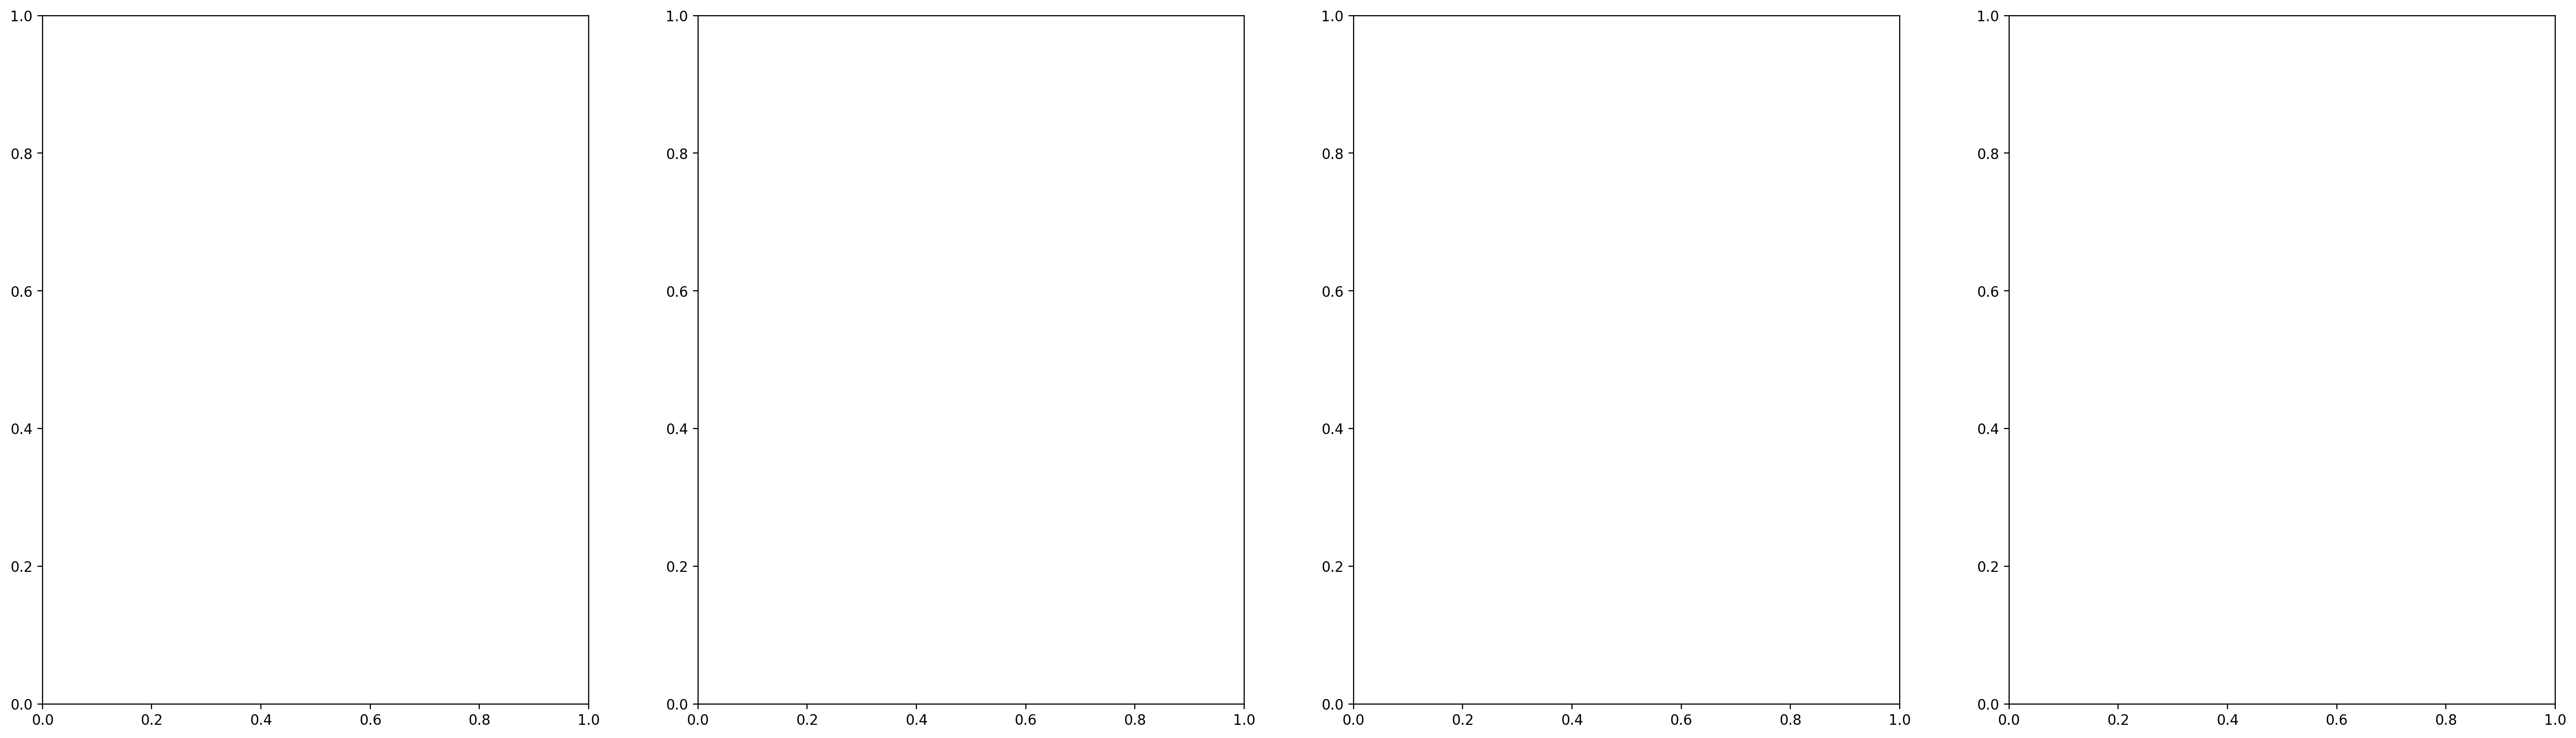

In [56]:
import cv2
fig3,axs = plt.subplots(1, 4,figsize=(32,9), dpi= 200, facecolor='w', edgecolor='k')
for i, modality_index, modality, label_type,ax in zip(range(4), [0, 3, 1, 2], ['T1','Flair','T1CE','T2'],['Background','Edma','Non-enhancing','Enhancing'],axs):
#     ax.imshow(image[0,modality_index,60,:,:],cmap='gray')
#     ax.imshow(label[0,i,60,:,:],alpha=0.5)
    image_to_plot = image[0,modality_index,60,:,:]
    image_to_plot_3= cv2.merge([image_to_plot,image_to_plot,image_to_plot])
    image_to_plot_3 = 255*(image_to_plot_3-image_to_plot_3.min())/(image_to_plot_3.max()-image_to_plot_3.min())
    label_to_plot = label[0,i,60,:,:]
    masked = apply_mask(image_to_plot_3,label_to_plot,colors[3],alpha=0.2)
    ax.imshow(masked.astype(np.uint8))
    #mask= np.ma.masked_where(label_to_plot == 1, label_to_plot) 
    #plt.imshow(image_to_plot,cmap='gray',interpolation='none')
    #plt.imshow(mask, 'jet', interpolation='none', alpha=0.3)
    #mask = ma.masked_where(Image2>0, Image2)
    #image_with_mask = ma.masked_array(image_to_plot,mask)
    ax.axis('off')
    ax.set_title(modality, y=1.0, pad=10,fontsize=32)
    #Zm = np.ma.masked_where(Z > 1.2, Z)
plt.tight_layout()
plt.show()

# label2 demonstrattion

In [ ]:
fig4,axs = plt.subplots(1, 4,figsize=(32,9), dpi= 200, facecolor='w', edgecolor='k')
for i, modality_index, modality, label_type,ax in zip(range(4), [0, 3, 1, 2], ['T1','Flair','T1CE','T2'],['Background','Edma','Non-enhancing','Enhancing'],axs):
#     ax.imshow(image[0,modality_index,60,:,:],cmap='gray')
#     ax.imshow(label[0,i,60,:,:],alpha=0.5)
    image_to_plot = image[0,modality_index,60,:,:]
    image_to_plot_3= cv2.merge([image_to_plot,image_to_plot,image_to_plot])
    image_to_plot_3 = 255*(image_to_plot_3-image_to_plot_3.min())/(image_to_plot_3.max()-image_to_plot_3.min())
    label_to_plot = label2[0,i,60,:,:]
    masked = apply_mask(image_to_plot_3,label_to_plot,colors[3],alpha=0.2)
    ax.imshow(masked.astype(np.uint8))
    #mask= np.ma.masked_where(label_to_plot == 1, label_to_plot) 
    #plt.imshow(image_to_plot,cmap='gray',interpolation='none')
    #plt.imshow(mask, 'jet', interpolation='none', alpha=0.3)
    #mask = ma.masked_where(Image2>0, Image2)
    #image_with_mask = ma.masked_array(image_to_plot,mask)
    ax.axis('off')
    ax.set_title(modality, y=1.0, pad=10,fontsize=32)
    #Zm = np.ma.masked_where(Z > 1.2, Z)
plt.tight_layout()
plt.show()

# difference between label and label2

In [ ]:
tumor_region = np.zeros(label_to_plot.shape)

In [ ]:
label_to_plot[label_1==0]=

In [ ]:
plt.imshow(label_to_plot)

In [ ]:
def random_colors(N, bright=True):
    """
    Generate random colors.
    To get visually distinct colors, generate them in HSV space then
    convert to RGB.
    """
    brightness = 1.0 if bright else 0.7
    hsv = [(i / N, 1, brightness) for i in range(N)]
    colors = list(map(lambda c: colorsys.hsv_to_rgb(*c), hsv))
    random.shuffle(colors)
    return colors
colors = random_colors(2)

fig5,axs = plt.subplots(1, 4,figsize=(32,9), dpi= 200, facecolor='w', edgecolor='k')
for i, modality_index, modality, label_type,ax in zip(range(4), [0, 3, 1, 2], ['T1','Flair','T1CE','T2'],['Background','Edma','Non-enhancing','Enhancing'],axs):
#     ax.imshow(image[0,modality_index,60,:,:],cmap='gray')
#     ax.imshow(label[0,i,60,:,:],alpha=0.5)
    image_to_plot = image[0,modality_index,60,:,:]
    image_to_plot_3= cv2.merge([image_to_plot,image_to_plot,image_to_plot])
    image_to_plot_3 = 255*(image_to_plot_3-image_to_plot_3.min())/(image_to_plot_3.max()-image_to_plot_3.min())
    label_1 = label[0,i,60,:,:]
    label_2 = label2[0,i,60,:,:]
    label_to_plot = label_1-label_2
    
    masked = apply_mask_values(image_to_plot_3,label_to_plot,[-1,1],colors,alpha=0.2)
    #masked = apply_mask_values(image_to_plot_3,label_to_plot,-1,colors[3],alpha=0.2)
    ax.imshow(masked.astype(np.uint8))`
    #mask= np.ma.masked_where(label_to_plot == 1, label_to_plot) 
    #plt.imshow(image_to_plot,cmap='gray',interpolation='none')
    #plt.imshow(mask, 'jet', interpolation='none', alpha=0.3)
    #mask = ma.masked_where(Image2>0, Image2)
    #image_with_mask = ma.masked_array(image_to_plot,mask)
    ax.axis('off')
    ax.set_title(label_type, y=1.0, pad=10,fontsize=32)
    #Zm = np.ma.masked_where(Z > 1.2, Z)
plt.tight_layout()
plt.show()

In [ ]:
def apply_mask_values(image, mask, values,colors, alpha=0.5):
    """Apply the given mask to the image.
    """
    for c,value,color in zip(range(3),values,colors):
        image[:, :, c] = np.where(mask == value,
                                  image[:, :, c] *
                                  (1 - alpha) + alpha * color[c] * 255,
                                  image[:, :, c])
    return image

In [ ]:
label_1 = label[0,i,60,:,:]
label_2 = label2[0,i,60,:,:]
label_to_plot = label_1-label2

In [ ]:
label_to_plot.min()

In [39]:
def to_binary(y):
        shape = y.shape
        #c = int(torch.max(y).item() + 1)
        out = torch.zeros([shape[0], 4, shape[2], shape[3], shape[4]])
        for i in range(4):
            out[:, i:i + 1, :, :, :] = (y == i)
        return out
    
def show_diff_pixel(self, flip_matrix, target, image, epoch):
    plot_dir = os.path.join(self.output_folder)
    self.subject_dir = os.path.join(plot_dir, 'flip_matrix', f'epoch{epoch}')

    flip_file = os.path.join(self.subject_dir, 'flip_matrix.nii.gz')
    image_file = os.path.join(self.subject_dir, 'image.nii.gz')
    target_file = os.path.join(self.subject_dir, 'target.nii.gz')
    self._save_nii(flip_file, flip_matrix.cpu().numpy(), None, None)
    self._save_nii(image_file, image.cpu().numpy(), None, None)
    self._save_nii(target_file, target.cpu().numpy(), None, None)

    label = self.to_binary(target)
    label2 = softmax_helper(torch.tanh(flip_matrix) + label)
    label2 = label2.argmax(1)
    label2 = torch.unsqueeze(label2, 1)
    label2 = self.to_binary(label2)
    # label2 = torch.where(label2 >= 3, torch.zeros_like(label2) + 3, label2)
    # label2 = torch.where((label2 < 3) & (label2 >= 2), torch.zeros_like(label2) + 2, label2)
    # label2 = torch.where((label2 < 2) & (label2 >= 1), torch.zeros_like(label2) + 1, label2)
    # label2 = torch.where(label2 < 1, torch.zeros_like(label2), label2)

    label = label[0].cpu().detach().numpy()
    label2 = label2[0].cpu().detach().numpy()

    diff = label2 - label

# 1. 以防你不太理解英文注释的意思，首先是有一个image图像矩阵，一个target标签矩阵，还有一个flip矩阵。 我们想要的图是背景是图像（注意有四个图像，可以先任意选其中之一，然后将target（其中数值取值是0,1,2,3）中的1,2,3分别作为一个有色的点印在图像上，画出三张图，分别是图像+和target中的1,2和3作图，这是第一步你要做的任务逻辑


# 2. 你会通过flip矩阵和target矩阵交互，你会得到一个新的矩阵，我们叫做label2，方便理解我们把target重新命名为label1，这个时候你就获得了两张图，数值类似的也会有0,1,2,3。这个时候你会需要去比较label1和label2，上面任务1中比如你将label中1的点画到图上，现在你需要去同时观察label1和label2中的1的数值位置，如果label1和label2在同样的位置都是数值为1，这个时候你用一种颜色画到图像上，比如绿色；如果label1中为1而label2中不为1，该位置用红色；类似的，label1中不为1，而label2中为1，用蓝色。

# 3，你会对数值1，2, 3进行同样的第二步操作，然后你就会获得3*3=9张图，你需要将这9张图subplot成3*3一起显示，这个时候你需要将第数值为1的标记背景，也就是image的第二维度的flair(3)那一张，也就是image[0,3,x,:,:], 数值为2的标记图像背景使用image的T1CE（1）那一张image[0,1,x,:,:],，类似的数值为3的标记使用image的T2(2)image[0,2,x,:,:] 作为背景。

# 4， 整个图像的dpi，图像尺寸和清晰度需要有保证，以及图像背景需要归一化，也就是你的图像背景的对比度要高，不能是很黑或者很白，你需要调整图像背景的对比度来实现

# 5，整体任务并不复杂，应该是毕设难度的1/5不到，大四的同学应该能够比较快的完成，我的预期是两周之内，当然也会根据你的实际进度我们在调整要求和建议。